<a href="https://colab.research.google.com/github/Karolis05/codeacademy/blob/main/Image_Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras import optimizers
from keras.callbacks import EarlyStopping
import os
import cv2  # (OPenCV) library to read and display the imgaes
import requests
import pathlib

# Set seeds to make the experiment more reproducible.
import tensorflow as tf

# set the random seed for TensorFlow
tf.random.set_seed(1)

In [ ]:
#Define the path to the folders and create lists for images and labels
#[ kaggle datasets download -d shreyapmaher/fruits-dataset-images]
folder_path = "C:\\Users\\karolis.s\\Downloads\\Fruits\\images"
fruit_classes = os.listdir(folder_path)
images = []
labels = [] 

This code processes fruit images stored in different folders based on their classes. It iterates over each fruit class and its folder, checking if each image file has a valid extension (.jpg, .png, .jpeg). If valid, it loads the image using OpenCV, resizes it to 32x32 pixels, converts the color space from BGR to RGB, and adds the processed image to the images list. The corresponding class label is also added to the labels list. This is done for all fruit classes and their images, resulting in a collection of preprocessed images and labels.

In [ ]:
valid_extensions = ['.jpg', '.png', '.jpeg']

for class_index, fruit_class in enumerate(fruit_classes):
    class_folder = os.path.join(folder_path, fruit_class)
    for image_name in os.listdir(class_folder):
        if any(image_name.lower().endswith(ext) for ext in valid_extensions):
            image_path = os.path.join(class_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (32, 32))  # Resize the image
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(image)
            labels.append(class_index)

In [ ]:
# Convert the list to NumPy arrays
images = np.array(images)
labels = np.array(labels)

Split data to train, validation and test

In [ ]:
from sklearn.model_selection import train_test_split

# Perform initial train-test split (80% for training, 20% for testing)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Perform further train-validation split (80% of training data for training, 20% for validation)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, stratify=train_labels, random_state=42)

# Verify the shape and class distribution of the datasets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Unique train labels:", np.unique(train_labels))
print("Unique validation labels:", np.unique(val_labels))
print("Unique test labels:", np.unique(test_labels))

Train images shape: (229, 32, 32, 3)
Train labels shape: (229,)
Validation images shape: (58, 32, 32, 3)
Validation labels shape: (58,)
Test images shape: (72, 32, 32, 3)
Test labels shape: (72,)
Unique train labels: [0 1 2 3 4 5 6 7 8]
Unique validation labels: [0 1 2 3 4 5 6 7 8]
Unique test labels: [0 1 2 3 4 5 6 7 8]


By splitting the data into training and validation sets, i can train and evaluate my model in a controlled and reliable manner. This allows me to make informed decisions regarding model selection, hyperparameter tuning, and understanding the model's performance on unseen data. 
Split the data into training and validation sets. 80% of data will be for training and 20% for validating. For shuffling the data - Random state is set to 42. fixed random state, obtain the same training and validation sets, which allows to reproduce and compare results. 

In [ ]:
# Checking if test_labels is encoded as a one-hot vector
if test_labels.ndim == 2:
    # One-hot vector encoding
    num_samples, num_classes = test_labels.shape
    is_one_hot_encoding = (np.sum(test_labels, axis=1) == 1) and (np.sum(test_labels, axis=1) == 0).all()
    if is_one_hot_encoding:
        print("test_labels is encoded as a one-hot vector.")

# Checking if test_labels is encoded as an integer label
elif test_labels.ndim == 1:
    # Integer label encoding
    unique_labels = np.unique(test_labels)
    num_unique_labels = len(unique_labels)
    print("test_labels is encoded as an integer label.")
    print("Number of unique labels:", num_unique_labels)
    print("Unique labels:", unique_labels)
else:
    print("test_labels has an unexpected shape.")


# Checking if val_labels is encoded as a one-hot vector
if val_labels.ndim == 2:
    # One-hot vector encoding
    num_samples, num_classes = val_labels.shape
    is_one_hot_encoding = (np.sum(val_labels, axis=1) == 1) and (np.sum(val_labels, axis=1) == 0).all()
    if is_one_hot_encoding:
        print("val_labels is encoded as a one-hot vector.")

# Checking if val_labels is encoded as an integer label
elif val_labels.ndim == 1:
    # Integer label encoding
    unique_labels = np.unique(val_labels)
    num_unique_labels = len(unique_labels)
    print("val_labels is encoded as an integer label.")
    print("Number of unique labels:", num_unique_labels)
    print("Unique labels:", unique_labels)
else:
    print("val_labels has an unexpected shape.")

test_labels is encoded as an integer label.
Number of unique labels: 9
Unique labels: [0 1 2 3 4 5 6 7 8]
val_labels is encoded as an integer label.
Number of unique labels: 9
Unique labels: [0 1 2 3 4 5 6 7 8]


EDA

The code above counts the number of images in each fruit class, displays the distribution of class labels using a bar plot, and shows example images from each class.

Display the count of images in each class. This give information about the distribution and balance of my dataset. This information can help to understand if the classes are evenly represented or if there is a class imbalance that needs to be addressed during training or evaluation.
Display the distribution of class labels  This visualization helps me to visualize the balance or imbalance of classes and understand the distribution of data across different categories.

Fruit class: apple fruit, Number of images: 40
Fruit class: banana fruit, Number of images: 40
Fruit class: cherry fruit, Number of images: 40
Fruit class: chickoo fruit, Number of images: 40
Fruit class: grapes fruit, Number of images: 40
Fruit class: kiwi fruit, Number of images: 40
Fruit class: mango fruit, Number of images: 39
Fruit class: orange fruit, Number of images: 40
Fruit class: strawberry fruit, Number of images: 40


<Figure size 640x480 with 0 Axes>

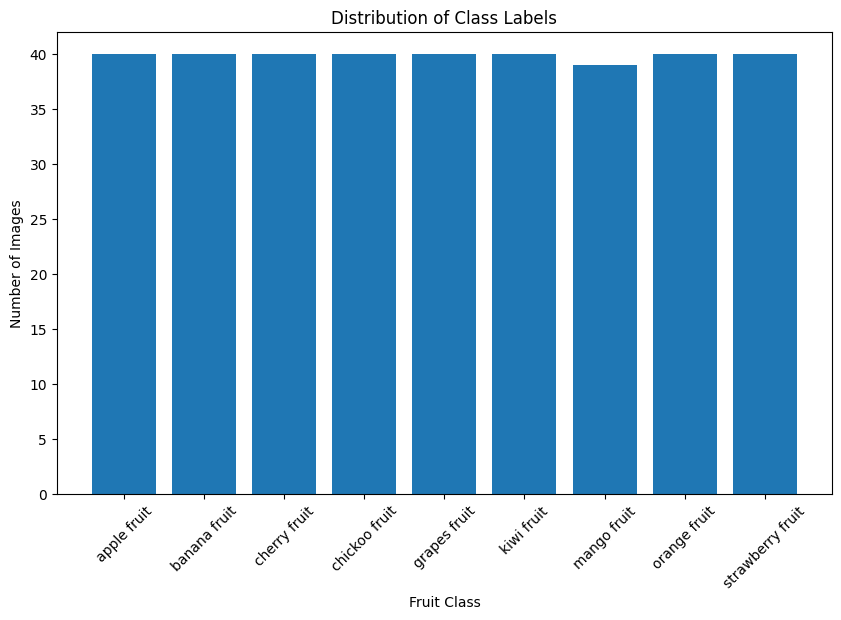

In [ ]:
# Display the count of images in each class
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    fruit_class = fruit_classes[label]
    print(f"Fruit class: {fruit_class}, Number of images: {count}")
    
# Display the distribution of class labels
plt.figure()
plt.figure(figsize=(10, 6))
plt.bar(fruit_classes, counts)
plt.xlabel('Fruit Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=45)
plt.show()

By executing this code, i will visualize a grid of example images, where each row represents a different class, and each column displays an example image from that class. This provides a visual representation of the images in my dataset and gives an idea of the characteristics and variations within each class.

<Figure size 640x480 with 0 Axes>

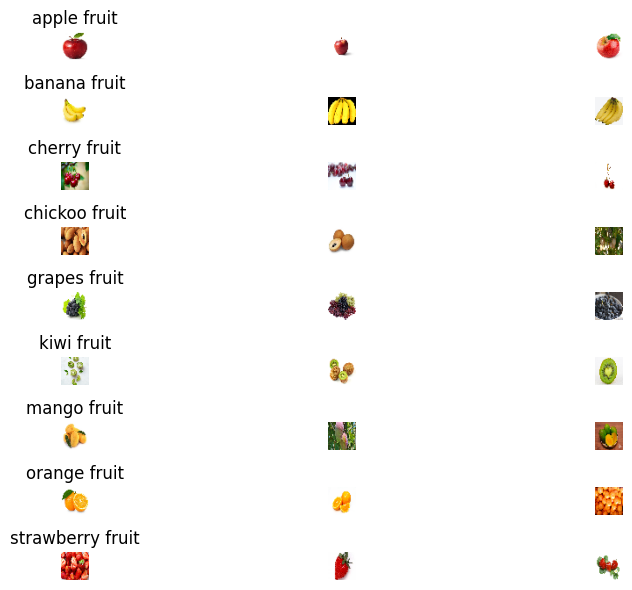

In [ ]:

# Display example images from each class
num_examples_per_class = 3
plt.figure()
plt.figure(figsize=(10, 6))
for label in unique_labels:
    indices = np.where(labels == label)[0][:num_examples_per_class]
    class_images = [images[idx] for idx in indices]
    
    for i, image in enumerate(class_images):
        plt.subplot(len(unique_labels), num_examples_per_class, label * num_examples_per_class + i + 1)
        plt.imshow(image)
        plt.axis('off')
        if i == 0:
            plt.title(fruit_classes[label])
plt.tight_layout()
plt.show()





The code above allow to explore various aspects of fruit image dataset, such as image dimensions, color channels, data augmentation, and image aspect ratios.

Visualize image dimensions: By examining the image dimensions, you can gain insights into the size and shape of the images in your dataset. This information can be useful for various purposes, such as image resizing, cropping, or configuring the input dimensions for  machine learning models.

<Figure size 640x480 with 0 Axes>

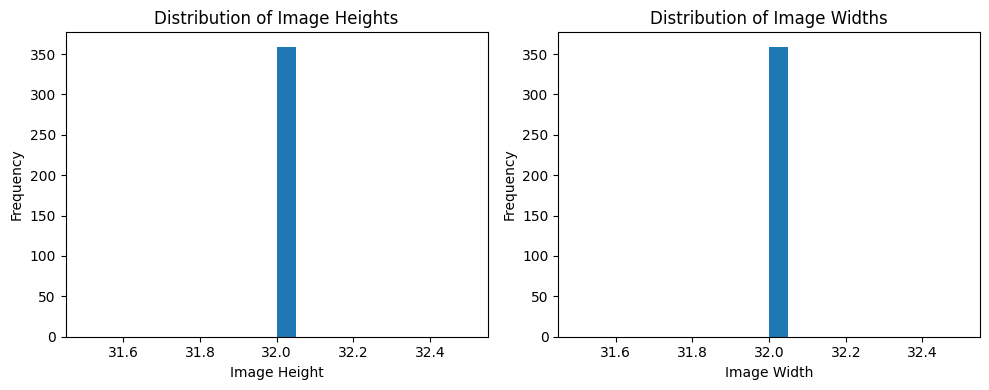

In [ ]:
# Collect image dimensions
image_heights = [image.shape[0] for image in images]
image_widths = [image.shape[1] for image in images]

# Plot image dimensions
plt.figure()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(image_heights, bins=20)
plt.xlabel('Image Height')
plt.ylabel('Frequency')
plt.title('Distribution of Image Heights')

plt.subplot(1, 2, 2)
plt.hist(image_widths, bins=20)
plt.xlabel('Image Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')

plt.tight_layout()
plt.show()

Visualize color channels: Mean pixel intensities provide information about the overall brightness or darkness of an image or a color channel. A higher mean pixel intensity indicates brighter regions, while a lower mean pixel intensity indicates darker regions. Mean pixel intensities for the red, green, and blue color channels are calculated separately. This information can be useful for understanding the color distribution and characteristics of your images, as well as for preprocessing or normalization steps in your image analysis pipeline.

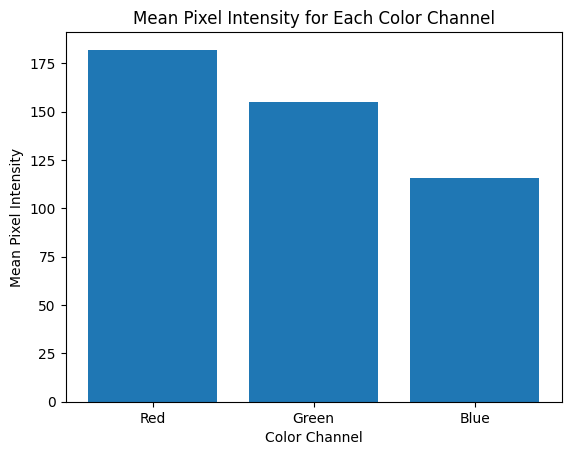

In [ ]:
# Calculate the mean pixel intensity for each color channel
red_channel_mean = np.mean([image[:, :, 0].mean() for image in images])
green_channel_mean = np.mean([image[:, :, 1].mean() for image in images])
blue_channel_mean = np.mean([image[:, :, 2].mean() for image in images])

# Create a bar plot to visualize mean pixel intensities
channel_names = ['Red', 'Green', 'Blue']
channel_means = [red_channel_mean, green_channel_mean, blue_channel_mean]

plt.figure()
plt.bar(channel_names, channel_means)
plt.xlabel('Color Channel')
plt.ylabel('Mean Pixel Intensity')
plt.title('Mean Pixel Intensity for Each Color Channel')
plt.show()


Augment data with image transformations: Augmenting data with image transformations refers to the process of applying various modifications or manipulations to the original images in order to create new training examples. This technique is commonly used to increase the diversity and variability of the training data and potentially improving its ability to generalize and perform well on unseen data.

<Figure size 640x480 with 0 Axes>

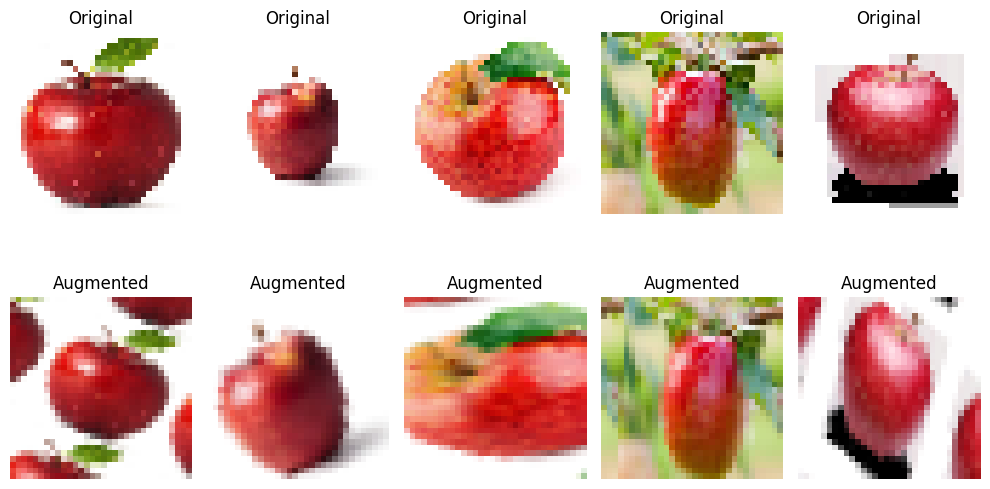

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator with desired augmentation options
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=-0.5,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='wrap'
)

# Display augmented images
plt.figure()
plt.figure(figsize=(10, 6))
for i in range(5):
    augmented_image = datagen.random_transform(images[i])
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(augmented_image)
    plt.title('Augmented')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
 generate new features based on these settings 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator with desired augmentation options
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=-0.5,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='wrap'
)

# Create an empty list to store augmented images and labels
augmented_images = []
augmented_labels = []

# Iterate over the original images and apply data augmentation
for image, label in zip(train_images, train_labels):
    # Expand dimensions to match the expected input shape
    image = np.expand_dims(image, axis=0)
    label = np.expand_dims(label, axis=0)

    # Generate augmented images and labels
    aug_iter = datagen.flow(image, label, batch_size=1)
    augmented_image, augmented_label = next(aug_iter)

    # Append augmented images and labels to the lists
    augmented_images.append(augmented_image.squeeze())
    augmented_labels.append(augmented_label.squeeze())

# Convert augmented images and labels to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate original and augmented data
train_images_augmented = np.concatenate([train_images, augmented_images])
train_labels_augmented = np.concatenate([train_labels, augmented_labels])

# Verify the shape of the augmented data
print("Augmented train images shape:", train_images_augmented.shape)
print("Augmented train labels shape:", train_labels_augmented.shape)

Augmented train images shape: (458, 32, 32, 3)
Augmented train labels shape: (458,)


Calculate image aspect ratios:  In the code  the aspect ratios of the images in the dataset are calculated by dividing the width of each image by its height. The resulting aspect ratios are then plotted in a histogram to visualize the distribution of aspect ratios across the dataset.  Rezult 1, because image size set to 32x32

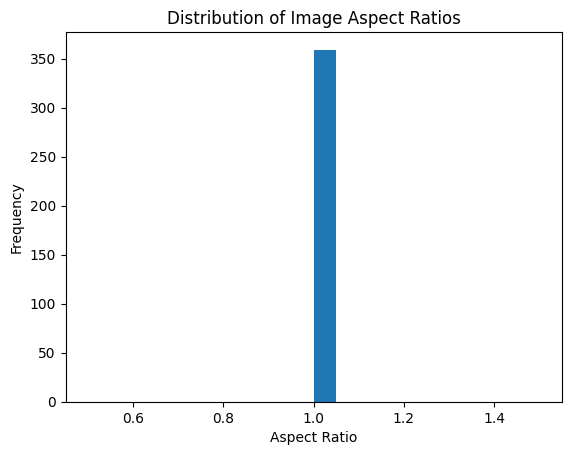

In [ ]:
aspect_ratios = [image.shape[1] / image.shape[0] for image in images]
plt.hist(aspect_ratios, bins=20)
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Image Aspect Ratios')
plt.show()

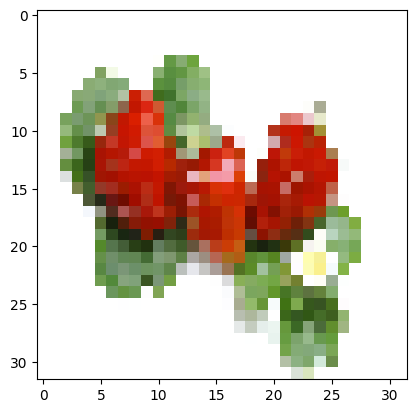

In [ ]:
#Normalize the pixel values of the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

In [ ]:
import tensorflow as tf

# Convert training data to tensors
train_images_augmented = tf.convert_to_tensor(train_images_augmented, dtype=tf.float32)
train_labels_augmented = tf.convert_to_tensor(train_labels_augmented, dtype=tf.int32)

# Convert validation data to tensors
val_images = tf.convert_to_tensor(val_images, dtype=tf.float32)
val_labels = tf.convert_to_tensor(val_labels, dtype=tf.int32)

# Convert test data to tensors
test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

In [ ]:
unique_train_labels = np.unique(train_labels)
#unique_train_labels = len(unique_train_labels)
print("Unique labels:", unique_train_labels)

Unique labels: [0 1 2 3 4 5 6 7 8]


Model setup, hyper parameters, architecture

In [ ]:
epochs = 500
batch = 100
lr = 0.3
adam = optimizers.Adam(lr)

In [ ]:
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Define the number of units in the output layer
num_classes = len(unique_train_labels)

# Define hyperparameters
epochs = 500
batch = 100
lr = 0.0003

# Create the model
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dropout(0.01))  # Adding dropout layer
model.add(layers.Dense(128, activation='sigmoid'))
#model.add(layers.Dropout(0.1))  # Adding dropout layer
model.add(layers.Dense(num_classes, activation='softmax'))
# Compile the model
adam = optimizers.Adam(lr)
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min', restore_best_weights=True)

# Train the model and get the history
history = model.fit(train_images_augmented, train_labels_augmented, epochs=epochs, batch_size=batch, callbacks=[early_stopping], validation_data=(val_images, val_labels))

Model: "sequential_167"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_177 (Conv2D)         (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_177 (MaxPooli  (None, 7, 7, 128)        0         
 ng2D)                                                           
                                                                 
 flatten_159 (Flatten)       (None, 6272)              0         
                                                                 
 dense_365 (Dense)           (None, 64)                401472    
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_366 (Dense)           (None, 128)               8320      
                                                    


The model was tested with various parameters, and additional augmentation data was added to the training data. Furthermore, the data was converted into tensors. In the final result, the model is slightly overfit. A deeper analysis and better feature selection are needed to improve the model's classification performance. Compared to the baseline model, the CNN model performs significantly better in classification.  

The baseline accuracy of the model, represented by the dummy_classifier using the strategy 'stratified', is 0.08333333333333333. This means that the baseline model predicts the correct class label for only 8.33% of the instances in the test data.
On the other hand, the CNN model achieves an accuracy of 0.5416666865348816, which is significantly higher than the baseline accuracy. The CNN model is trained on the augmented training data (train_images_augmented) and their corresponding labels (train_labels_augmented). Once trained, the CNN model is used to predict the class labels for the test images (test_images).

<Figure size 640x480 with 0 Axes>

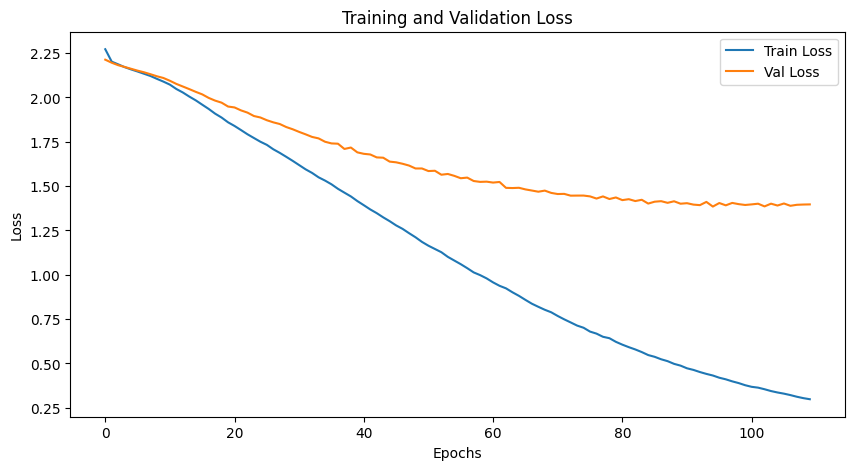

<Figure size 640x480 with 0 Axes>

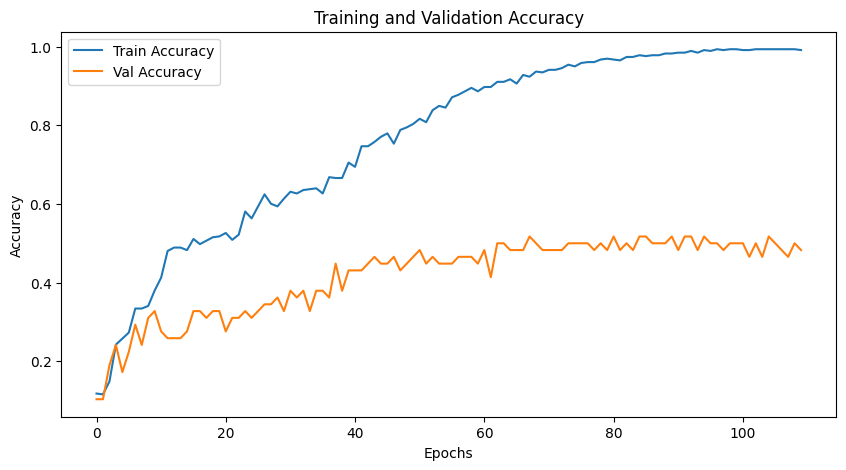

In [ ]:


# Plot the training and validation loss
plt.figure()
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

3/3 - 0s - loss: 1.2732 - accuracy: 0.5417 - 29ms/epoch - 10ms/step
Test accuracy: 0.5416666865348816


In [ ]:
predictions = model.predict(test_images)

3/3 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier using the majority class strategy
dummy_classifier = DummyClassifier(strategy='stratified')

# Fit the dummy classifier on the training data
dummy_classifier.fit(train_images_augmented, train_labels_augmented)

# Get the baseline predictions on the test data
baseline_predictions = dummy_classifier.predict(test_images)

# Print the baseline predictions
print("Baseline Predictions:", baseline_predictions)

baseline_accuracy = np.sum(baseline_predictions == test_labels) / len(test_labels)
print("Baseline Accuracy:", baseline_accuracy)
print("CNN Model Accuracy:", test_acc)



Baseline Predictions: [1 6 2 2 6 5 3 7 1 8 7 1 8 1 1 1 0 4 6 6 7 5 6 4 1 7 3 3 4 1 4 5 6 4 0 8 4
 3 6 0 7 4 4 2 0 1 8 6 7 1 4 0 0 5 6 2 3 6 7 2 8 8 4 8 0 4 7 8 5 5 8 3]
Baseline Accuracy: 0.08333333333333333
CNN Model Accuracy: 0.5416666865348816
